Epoch 1/100
4/4 - 0s - loss: 0.4600 - mean_squared_error: 0.4600 - val_loss: 0.4208 - val_mean_squared_error: 0.4208
Epoch 2/100
4/4 - 0s - loss: 0.3698 - mean_squared_error: 0.3698 - val_loss: 0.3554 - val_mean_squared_error: 0.3554
Epoch 3/100
4/4 - 0s - loss: 0.3231 - mean_squared_error: 0.3231 - val_loss: 0.3049 - val_mean_squared_error: 0.3049
Epoch 4/100
4/4 - 0s - loss: 0.2903 - mean_squared_error: 0.2903 - val_loss: 0.2761 - val_mean_squared_error: 0.2761
Epoch 5/100
4/4 - 0s - loss: 0.2724 - mean_squared_error: 0.2724 - val_loss: 0.2548 - val_mean_squared_error: 0.2548
Epoch 6/100
4/4 - 0s - loss: 0.2598 - mean_squared_error: 0.2598 - val_loss: 0.2320 - val_mean_squared_error: 0.2320
Epoch 7/100
4/4 - 0s - loss: 0.2495 - mean_squared_error: 0.2495 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 8/100
4/4 - 0s - loss: 0.2478 - mean_squared_error: 0.2478 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 9/100
4/4 - 0s - loss: 0.2466 - mean_squared_error: 0.2466

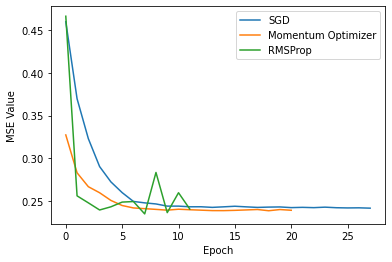

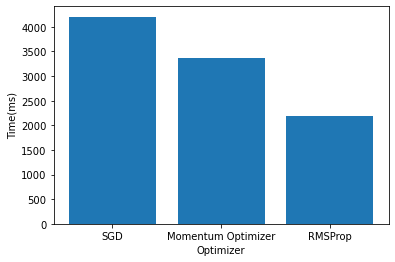

In [2]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import Activation, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
from sklearn.utils import shuffle
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import time

start=-1
step=(2/9)
num=10

train_x = np.arange(0,num)*step+start
train_y = train_x
test_x = np.arange(0,9)*step+(-1+(1/9))
test_y = test_x
scaler = MinMaxScaler(feature_range=(-1,1))
tmp_data = np.random.rand(1,50)
tmp_x = np.transpose(tmp_data)
scaler.fit(tmp_x)
val_x = np.transpose(scaler.transform(tmp_x))
val_y = val_x
[train_X, train_Y] = np.meshgrid(train_x, train_y)
[test_X, test_Y] = np.meshgrid(test_x, test_y);
[val_X, val_Y] = np.meshgrid(val_x, val_y);
train_Z = np.cos(train_X + 6*0.35*train_Y) + 2.0*0.35*train_X*train_Y
test_Z = np.cos(test_X + 6*0.35*test_Y) + 2.0*0.35*test_X*test_Y
val_Z = np.cos(val_X + 6*0.35*val_Y) + 2.0*0.35*val_X*val_Y
trainx = train_X.flatten()
trainy = train_Y.flatten()
trainData = [trainy, trainx]
trainData = np.array(trainData)
testx = test_X.flatten()
testy = test_Y.flatten()
testData = [testy, testx]
testData = np.array(testData)
trainLabel = np.array(train_Z.flatten())
testLabel = np.array(test_Z.flatten())
valx = val_X.flatten()
valy = val_Y.flatten()
valData = [valy, valx]
valData = np.array(valData)
valLabel = np.array(val_Z.flatten())
trainData = np.transpose(trainData)
trainLabel = np.transpose(trainLabel)
testData = np.transpose(testData)
testLabel = np.transpose(testLabel)
valData = np.transpose(valData)
valLabel = np.transpose(valLabel)
trainLabel = np.reshape(trainLabel, (100, 1))
testLabel = np.reshape(testLabel, (81, 1))
valLabel = np.reshape(valLabel, (2500, 1))

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig, ax = plt.subplots()
opt = [tf.keras.optimizers.SGD(learning_rate=0.02),
       tf.compat.v1.train.MomentumOptimizer(learning_rate=0.02, momentum=0.001),
       tf.keras.optimizers.RMSprop(learning_rate=0.02)]
acc = []
epc = []
mseData = []
Times = []
models = ["SGD", "Momentum Optimizer", "RMSProp"]
for iter in range (0, 3):
  times = []
  startT = int(round(time.time() * 1000))
  model = Sequential()
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(2))
  model.compile(
    optimizer= opt[iter],
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()])
  monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
  history = model.fit(trainData, trainLabel, validation_data=(valData, valLabel), callbacks=[monitor], verbose=2,epochs=100)
  acc.append(model.evaluate(testData, testLabel))
  x = history.history['mean_squared_error']
  plt.plot(x, label=models[iter])
  times.append(int(round(time.time() * 1000)) - startT)
  startT = int(round(time.time() * 1000))
  Times.append(times)



plt.ylabel('MSE Value')
plt.xlabel('Epoch')
plt.legend()

fig, ax = plt.subplots()
plt.bar([0, 1, 2], [np.mean(Times[0]), np.mean(Times[1]), np.mean(Times[2])])
plt.xticks([0, 1, 2], models)
plt.ylabel('Time(ms)')
plt.xlabel('Optimizer')
plt.show()